# EDA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import random
import re
import pickle
import os

# fix random seed
seed = 0
random.seed(seed)
np.random.seed(seed)

In [2]:
train = pd.read_csv("./data/raw_data/train.csv")
test = pd.read_csv("./data/raw_data/test.csv")
sample = pd.read_csv("./data/raw_data/sample_submission.csv")

In [3]:
train.head()

,ID,review,sentiment
0,41411,I watched this film because I'm a big fan of R...,0
1,37586,It does not seem that this movie managed to pl...,1
2,6017,"Enough is not a bad movie , just mediocre .",0
3,44656,my friend and i rented this one a few nights a...,0
4,38711,"Just about everything in this movie is wrong, ...",0


In [4]:
train.isnull().sum()

ID           0
review       0
sentiment    0
dtype: int64

In [5]:
test.head()

,ID,review
0,22622,Robert Lansing plays a scientist experimenting...
1,10162,"Well I've enjoy this movie, even though someti..."
2,17468,First things first - though I believe Joel Sch...
3,42579,I watched this movie on the grounds that Amber...
4,701,A certain sexiness underlines even the dullest...


In [6]:
test.isnull().sum()

ID        0
review    0
dtype: int64

In [7]:
sample.head()

,ID,sentiment
0,22622,1
1,10162,1
2,17468,1
3,42579,1
4,701,1


In [8]:
sample.isnull().sum()

ID           0
sentiment    0
dtype: int64

## EDA

In [9]:
print("train data:", len(train))
print("test data:", len(test))

train data: 29341
test data: 29341


In [10]:
print("Positive data:", len(train[train["sentiment"] == 1]))
print("Negative data:", len(train[train["sentiment"] == 0]))

Positive data: 14954
Negative data: 14387


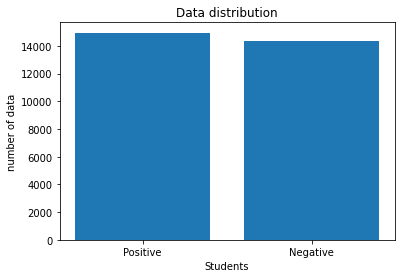

In [11]:
x_axis_label = ["Positive", "Negative"]
num_data = [len(train[train["sentiment"] == 1]), len(train[train["sentiment"] == 0])]
x = np.arange(len(x_axis_label))
plt.bar(x, num_data)
plt.xticks(x, x_axis_label)
plt.xlabel("Students")
plt.ylabel("number of data")
plt.title("Data distribution")
plt.show()

### average length

In [12]:
len_list = []
for i in range(len(train)):
    _, review, _ = train.iloc[i]
    if "<br />" in review:
        review_new = re.sub("<br />", " ", review)
        review_new = review_new.strip().split()
    else:
        review_new = review.strip().split()

    len_list.append(len(review_new))

In [13]:
print("mean: {:<5.2f}".format(np.mean(len_list)))
print("max : {:<5.2f}".format(np.max(len_list)))
print("min : {:<5.2f}".format(np.min(len_list)))
print("std : {:<5.2f}".format(np.std(len_list)))

mean: 196.84
max : 2088.00
min : 2.00 
std : 171.53


### remove `<br />` character

In [14]:
# train_rm_br = train.copy()
# test_rm_br = test.copy()

# # train
# for i in range(len(train_rm_br)):
#     _,review,_=train_rm_br.iloc[i]
#     if ('<br />' in review):
#         review_new = re.sub('<br />', ' ', review)
#         review_new = ' '.join(review_new.strip().split())
#     else:
#         review_new = ' '.join(review.strip().split())
#     train_rm_br.loc[i, 'review']=review_new

# # test
# for i in range(len(test_rm_br)):
#     _,review=test_rm_br.iloc[i]
#     if ('<br />' in review):
#         review_new = re.sub('<br />', ' ', review)
#         review_new = ' '.join(review_new.strip().split())
#     else:
#         review_new = ' '.join(review.strip().split())
#     test_rm_br.loc[i, 'review']=review_new

# train_rm_br.to_pickle("./data/train_rm_br.pkl")
# test_rm_br.to_pickle("./data/test_rm_br.pkl")

In [15]:
train_rm_br = pd.read_pickle("./data/train_rm_br.pkl")
test_rm_br = pd.read_pickle("./data/test_rm_br.pkl")

In [16]:
print(
    "Same perenctage: {:.4f}".format(
        sum(train_rm_br["review"] == train["review"]) / len(train_rm_br["review"])
    )
)

Same perenctage: 0.4997


In [17]:
print(
    "Same perenctage: {:.4f}".format(
        sum(test_rm_br["review"] == test["review"]) / len(test_rm_br["review"])
    )
)

Same perenctage: 0.4991


## Train / test split

In [18]:
X = train_rm_br["review"]
y = train_rm_br["sentiment"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
print("Training set:", len(X_train))
print("Test set:", len(X_test))

print("sum:", len(X_train) + len(X_test))

Training set: 23472
Test set: 5869
sum: 29341


### check data balance

In [21]:
print("Training POS data:", sum(y_train == 1))
print("Training NEG data:", sum(y_train == 0))
print("-" * 20)
print("Test POS data:", sum(y_test == 1))
print("Test NEG data:", sum(y_test == 0))
print("-" * 20)
print(
    "Total:",
    sum(y_train == 1) + sum(y_train == 0) + sum(y_test == 1) + sum(y_test == 0),
)

Training POS data: 11960
Training NEG data: 11512
--------------------
Test POS data: 2994
Test NEG data: 2875
--------------------
Total: 29341


In [22]:
path = "./data/train_test_split"
if not os.path.isdir(path):
    os.mkdir(path)
X_train.to_pickle(os.path.join(path, "./X_train.pkl"))
X_test.to_pickle(os.path.join(path, "./X_test.pkl"))
y_train.to_pickle(os.path.join(path, "./y_train.pkl"))
y_test.to_pickle(os.path.join(path, "./y_test.pkl"))

## Train / Validation split

In [25]:
X_tr, X_va, y_tr, y_va = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0
)

### check data balance

In [26]:
print("Training POS data:", sum(y_tr == 1))
print("Training NEG data:", sum(y_tr == 0))
print("-" * 20)
print("Test POS data:", sum(y_va == 1))
print("Test NEG data:", sum(y_va == 0))
print("-" * 20)
print(
    "Total:",
    sum(y_tr == 1) + sum(y_tr == 0) + sum(y_va == 1) + sum(y_va == 0),
)

Training POS data: 9531
Training NEG data: 9246
--------------------
Test POS data: 2429
Test NEG data: 2266
--------------------
Total: 23472


In [27]:
path = "./data/train_valid_split"
if not os.path.isdir(path):
    os.mkdir(path)
X_tr.to_pickle(os.path.join(path, "X_tr.pkl"))
X_va.to_pickle(os.path.join(path, "X_va.pkl"))
y_tr.to_pickle(os.path.join(path, "y_tr.pkl"))
y_va.to_pickle(os.path.join(path, "y_va.pkl"))

## 5-Fold CV

In [45]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
print(skf)

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)


In [46]:
def cv(X, y):
    X_train_list = []
    X_valid_list = []
    y_train_list = []
    y_valid_list = []
    count = 1

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(f"***[Fold {count}]***")
        print("TRAIN:", len(train_index), "TEST:", len(test_index))
        print()
        print("Training POS data:", sum(y_train == 1))
        print("Training NEG data:", sum(y_train == 0))
        print()
        print("Test POS data:", sum(y_test == 1))
        print("Test NEG data:", sum(y_test == 0))
        print()
        print(
            "Total:",
            sum(y_train == 1) + sum(y_train == 0) + sum(y_test == 1) + sum(y_test == 0),
        )
        X_train_list.append(X_train)
        X_valid_list.append(X_test)
        y_train_list.append(y_train)
        y_valid_list.append(y_test)
        print("=" * 20)
        count += 1
    return X_train_list, X_valid_list, y_train_list, y_valid_list


X_train_list, X_valid_list, y_train_list, y_valid_list = cv(
    X_train.values, y_train.values
)

***[Fold 1]***
TRAIN: 18777 TEST: 4695

Training POS data: 9568
Training NEG data: 9209

Test POS data: 2392
Test NEG data: 2303

Total: 23472
***[Fold 2]***
TRAIN: 18777 TEST: 4695

Training POS data: 9568
Training NEG data: 9209

Test POS data: 2392
Test NEG data: 2303

Total: 23472
***[Fold 3]***
TRAIN: 18778 TEST: 4694

Training POS data: 9568
Training NEG data: 9210

Test POS data: 2392
Test NEG data: 2302

Total: 23472
***[Fold 4]***
TRAIN: 18778 TEST: 4694

Training POS data: 9568
Training NEG data: 9210

Test POS data: 2392
Test NEG data: 2302

Total: 23472
***[Fold 5]***
TRAIN: 18778 TEST: 4694

Training POS data: 9568
Training NEG data: 9210

Test POS data: 2392
Test NEG data: 2302

Total: 23472


In [49]:
path = "./data/5_fold"
if not os.path.isdir(path):
    os.mkdir(path)

with open(os.path.join(path, "X_train_list.pkl"), "wb") as f:
    pickle.dump(X_train_list, f)

with open(os.path.join(path, "X_valid_list.pkl"), "wb") as f:
    pickle.dump(X_valid_list, f)

with open(os.path.join(path, "y_train_list.pkl"), "wb") as f:
    pickle.dump(y_train_list, f)

with open(os.path.join(path, "y_valid_list.pkl"), "wb") as f:
    pickle.dump(y_valid_list, f)